In [1]:
import sys

sys.path.append("../..")

import torch
from fourier_scaffold import (
    HadamardShiftMatrix,
    HadamardShift,
    HadamardShiftRat,
    HadamardShiftMatrixRat,
    FourierScaffold,
)

shapes = torch.tensor([(3, 3), (5, 5)])
shift_rat = HadamardShiftMatrixRat(shapes=shapes)
shift_nonrat = HadamardShiftMatrix()

/home/ezrahuang/Projects/rl-research/vectorhash/experiments/fourier_ratshift/../../vectorhash_functions.py:1: UserWarning: A NumPy version >=1.23.5 and <2.5.0 is required for this version of SciPy (detected version 1.23.0)
  import scipy.special


In [4]:
scaffold = FourierScaffold(
    shapes=shapes,
    D=400,
    shift=shift_rat,
    _skip_K_calc=True,
    _skip_gs_calc=True,
    representation='matrix'
)

module shapes:  tensor([[3, 3],
        [5, 5]])
N_g (D) :  400
M       :  2
d       :  2
N_patts :  225


/home/ezrahuang/Projects/rl-research/vectorhash/experiments/fourier_ratshift/../../fourier_scaffold.py:356: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.shapes = torch.tensor(shapes).int()


In [ ]:
scaffold.P = scaffold.zero()

In [58]:
scaffold.velocity_shift(torch.tensor([-2,0]))

In [67]:
scaffold.sharpen()

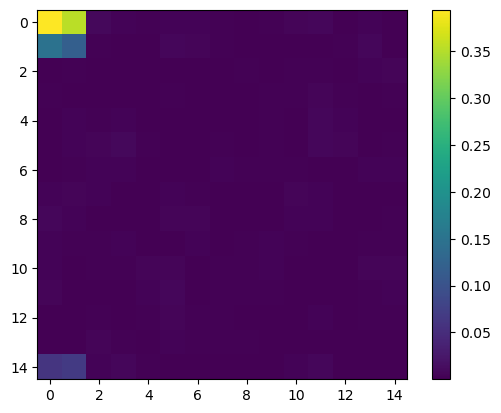

In [68]:
import matplotlib.pyplot as plt
plt.imshow(scaffold.get_all_probabilities())
plt.colorbar()

In [22]:
def combine_additive(P1, P2, alpha=0.5):
    P = (1 - alpha) * (P1) + alpha * P2
    return P


def combine_multiplicative(P1, P2):
    P = torch.exp(torch.log(P1) + torch.log(P2))
    return P

In [23]:
scaffold = FourierScaffold(
    shapes=shapes,
    D=400,
    shift=shift_rat,
    _skip_K_calc=True,
    _skip_gs_calc=True,
    representation='matrix'
)

P_original = scaffold.P.clone()
scaffold.velocity_shift(torch.tensor([0.5,0]))
P_shifted = scaffold.P.clone()
P_combined = combine_multiplicative(P_original, P_shifted)

module shapes:  tensor([[3, 3],
        [5, 5]])
N_g (D) :  400
M       :  2
d       :  2
N_patts :  225


/home/ezrahuang/Projects/rl-research/vectorhash/experiments/fourier_ratshift/../../fourier_scaffold.py:356: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.shapes = torch.tensor(shapes).int()


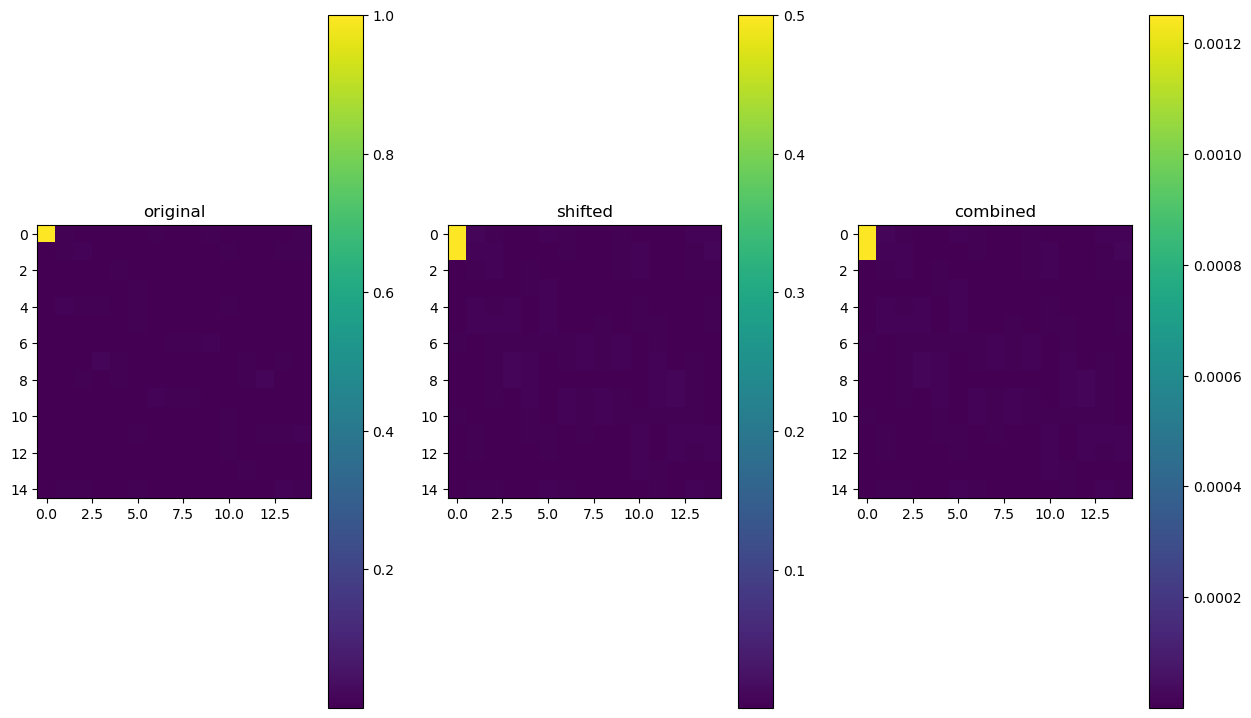

In [24]:
import matplotlib.pyplot as plt
from graph_utils import plot_imgs_side_by_side

fig, ax = plt.subplots(1, 3, figsize=(15,9))
plot_imgs_side_by_side(
  imgs=[scaffold.get_all_probabilities(P) for P in [P_original, P_shifted, P_combined]],
  titles=['original', 'shifted', 'combined'],
  axs=ax,
  fig=fig,
  use_first_img_scale=False
)